In [1]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input

# 데이터 불러오기
# 훈련 정의
# 학습
# 평가

In [2]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 3

In [3]:
import numpy as np
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1] -3

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, test_size=0.3)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
history = model.fit(train_X, train_y.to_numpy(), batch_size=200, epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 6ms/step - loss: 1.4925 - accuracy: 0.3450
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 1.2526 - accuracy: 0.4477
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2408 - accuracy: 0.4164
Epoch 4/300
6/6 [==============================] - 0s 475us/step - loss: 1.2246 - accuracy: 0.4468
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1682 - accuracy: 0.4674
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1836 - accuracy: 0.4853
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1648 - accuracy: 0.4835
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1720 - accuracy: 0.4772
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1665 - accuracy: 0.4763
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1599 - accuracy: 0.4853
Epoch 11/300
6/6 [=========

In [8]:
model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 1ms/step - loss: 0.9830 - accuracy: 0.5896


[0.9829556345939636, 0.5895833373069763]

In [9]:
import matplotlib.pyplot as plt

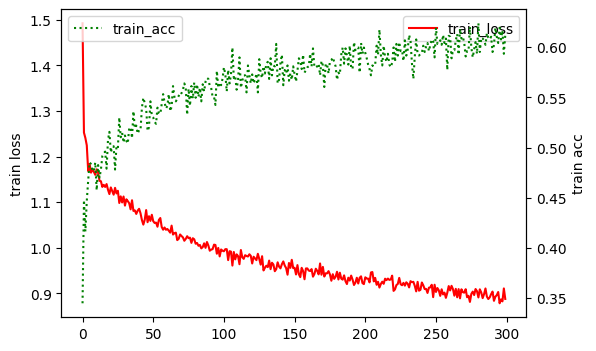

In [11]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history["loss"], "r-", label="train_loss")
ax1.set_ylabel("train loss")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history["accuracy"], "g:", label="train_acc")
ax2.set_ylabel("train acc")
ax2.legend()
plt.show()